# Introduction

Welcome to Matthew, Rahul, and Amila's project.
This is our Colab notebook portion of the project.

Throughout this notebook we'll analyze 2020 US presidential election predictive markets correlation with stock markets.  Our objective is to determine which companies’ prospects are tied to each candidate, by how much they are expected to increase or decrease, and how the market as a whole will perform if a candidate wins. We will try to build the portfolio that will be hedging risk of the US elections. 

We'll walk you through the entire process by installing necessary requirements, downloading and acquiring datasets, extracting features, conducting EDA, and doing modelling and visualization. 

In addition to this, you can visit our web page to interact with the visualization: [Click here!](https://amilamujkic.github.io/CIS545_Website_Design/)

Check out our video in the extra attachments!

Enjoy!

# Web Page

You can visit live web page 
[here!](https://amilamujkic.github.io/CIS545_Website_Design/)

# First steps

In [ ]:
!pip install pandas==1.1.5

import pandas as pd
from datetime import datetime
from pytz import timezone
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce

     |████████████████████████████████| 9.5 MB 9.2 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


# Fetching necessary data



Some of this code will require the user to have data in their private drive. 
<br> We utilized the below drive for much our analysis. You can access the files and modify your respective google drive paths if you wish to run this notebook. <br><br>



*  Click on this [Google Drive](https://drive.google.com/drive/folders/1ZJPDngYzSYMCtk8B5luoeCoQOIIoC4nv?usp=sharing) and download "CIS 545 Project Data"

* Upload the folder "CIS 545 Project Data" to your personal Google Drive



In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
dataset_dir = '/content/drive/MyDrive/CIS 545 Project Data'

Mounted at /content/drive


# Exploratory Data Analysis

## Betting Data and S&P 500 Data 
In this section, we wanted to know if there was any relationship between Donald Trump's odds and the closing price of the S&P 500.

The betting data has betting odds of many candidates starting from 2016-11-14 12:00:00 London time. We are adding the corresponding New York timestamp to the data.

In [ ]:
betting_df = pd.read_csv(dataset_dir + '/Bet Data/betdata_us_presidential_election_2020_20220310_0931_full.csv')
betting_df['timestampLON'] = pd.to_datetime(betting_df['timestampLON'])
betting_df['timestampNY'] = betting_df['timestampLON'].dt.tz_localize('Europe/London', ambiguous = 'infer').dt.tz_convert('America/New_York')
betting_df['timestampNY'] = betting_df['timestampNY'].apply(lambda x: datetime.replace(x, tzinfo=None))
betting_df['dateNY'] = betting_df['timestampNY'].dt.normalize()

We are removing rows where the odds are zero for Trump or Biden (21 rows are removed), adding the probability columns for Trump and Biden based on their odds, and removing rows after the election (the betting odds become very sporadic after 11-03-2020).

In [ ]:
betting_df = betting_df[(betting_df['Donald Trump'] != 0) & (betting_df['Joe Biden'] != 0)].copy()
betting_df['Donald Trump Prob'] = 100 / betting_df['Donald Trump']
betting_df['Joe Biden Prob'] = 100 / betting_df['Joe Biden']
betting_df = betting_df[betting_df['dateNY'] <= np.datetime64('2020-11-03')]
betting_df

,timestampLON,Donald Trump,Joe Kennedy,Marianne Williamson,Mike Gravel,Seth Moulton,Jon Stewart,Michael Bennet,Bill Weld,Wayne Messam,...,Eric Garcetti,Dwayne Johnson,Ken Bone,Patrick Leahy,all_time_volume,volume,timestampNY,dateNY,Donald Trump Prob,Joe Biden Prob
0,2016-11-14 12:00:00,3.73,0,0,0.0,0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0,5403,0,2016-11-14 07:00:00,2016-11-14,26.809651,0.190476
1,2016-11-14 13:00:00,3.73,0,0,0.0,0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0,5403,0,2016-11-14 08:00:00,2016-11-14,26.809651,0.190476
2,2016-11-14 14:00:00,3.68,0,0,0.0,0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0,5409,6,2016-11-14 09:00:00,2016-11-14,27.173913,0.190476
3,2016-11-14 15:00:00,3.68,0,0,0.0,0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0,5420,11,2016-11-14 10:00:00,2016-11-14,27.173913,0.190476
4,2016-11-14 16:00:00,3.68,0,0,0.0,0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0,5480,60,2016-11-14 11:00:00,2016-11-14,27.173913,0.190476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34778,2020-11-04 00:00:00,3.08,1000,1000,1000.0,1000,1000.0,1000.0,1000.0,1000,...,1000.0,1000.0,1000.0,1000,338935150,3415415,2020-11-03 19:00:00,2020-11-03,32.467532,67.114094
34779,2020-11-04 01:00:00,2.23,1000,1000,1000.0,1000,1000.0,1000.0,1000.0,1000,...,1000.0,1000.0,1000.0,1000,350433582,11498432,2020-11-03 20:00:00,2020-11-03,44.843049,55.248619
34780,2020-11-04 02:00:00,2.37,1000,1000,1000.0,1000,1000.0,1000.0,1000.0,1000,...,1000.0,1000.0,1000.0,1000,360320166,9886584,2020-11-03 21:00:00,2020-11-03,42.194093,57.142857
34781,2020-11-04 03:00:00,1.31,1000,1000,1000.0,1000,1000.0,1000.0,1000.0,1000,...,1000.0,1000.0,1000.0,1000,373632267,13312101,2020-11-03 22:00:00,2020-11-03,76.335878,23.529412


We are getting the betting odds of Trump when the stock market closes.

In [ ]:
trump_df = betting_df[['timestampLON', 'Donald Trump', 'all_time_volume', 'volume', 'timestampNY', 'dateNY']].copy()
trump_smclose_df = trump_df[trump_df['timestampNY'].dt.hour == 16].copy()
trump_smclose_df

,timestampLON,Donald Trump,all_time_volume,volume,timestampNY,dateNY
9,2016-11-14 21:00:00,3.68,5844,3,2016-11-14 16:00:00,2016-11-14
33,2016-11-15 21:00:00,3.65,7115,237,2016-11-15 16:00:00,2016-11-15
57,2016-11-16 21:00:00,3.75,7667,6,2016-11-16 16:00:00,2016-11-16
81,2016-11-17 21:00:00,3.60,8264,13,2016-11-17 16:00:00,2016-11-17
105,2016-11-18 21:00:00,3.63,8620,0,2016-11-18 16:00:00,2016-11-18
...,...,...,...,...,...,...
34678,2020-10-30 20:00:00,2.97,233923332,94113,2020-10-30 16:00:00,2020-10-30
34702,2020-10-31 20:00:00,3.08,241932718,768743,2020-10-31 16:00:00,2020-10-31
34727,2020-11-01 21:00:00,2.99,254601267,1724139,2020-11-01 16:00:00,2020-11-01
34751,2020-11-02 21:00:00,2.97,287203123,848851,2020-11-02 16:00:00,2020-11-02


We are reading the S&P 500 data.

In [ ]:
sp500_df = pd.read_csv(dataset_dir + '/Financial Data/SP&500_Historical_Prices.csv', skipinitialspace=True)
sp500_df['Date'] = pd.to_datetime(sp500_df['Date'])

We are merging Trump betting data with the S&P 500 Prices on the date.



In [ ]:
betdatamktclose_df = trump_smclose_df.merge(sp500_df, left_on='dateNY', right_on='Date')
betdatamktclose_df

,timestampLON,Donald Trump,all_time_volume,volume,timestampNY,dateNY,Date,Open,High,Low,Close
0,2016-11-14 21:00:00,3.68,5844,3,2016-11-14 16:00:00,2016-11-14,2016-11-14,2165.64,2171.36,2156.08,2164.20
1,2016-11-15 21:00:00,3.65,7115,237,2016-11-15 16:00:00,2016-11-15,2016-11-15,2168.29,2180.84,2166.38,2180.39
2,2016-11-16 21:00:00,3.75,7667,6,2016-11-16 16:00:00,2016-11-16,2016-11-16,2177.53,2179.22,2172.20,2176.94
3,2016-11-17 21:00:00,3.60,8264,13,2016-11-17 16:00:00,2016-11-17,2016-11-17,2178.61,2188.06,2176.65,2187.12
4,2016-11-18 21:00:00,3.63,8620,0,2016-11-18 16:00:00,2016-11-18,2016-11-18,2186.85,2189.89,2180.38,2181.90
...,...,...,...,...,...,...,...,...,...,...,...
994,2020-10-28 20:00:00,2.95,204778838,54890,2020-10-28 16:00:00,2020-10-28,2020-10-28,3342.48,3342.48,3268.89,3271.03
995,2020-10-29 20:00:00,2.89,223303988,632665,2020-10-29 16:00:00,2020-10-29,2020-10-29,3277.17,3341.05,3259.82,3310.11
996,2020-10-30 20:00:00,2.97,233923332,94113,2020-10-30 16:00:00,2020-10-30,2020-10-30,3293.59,3304.93,3233.94,3269.96
997,2020-11-02 21:00:00,2.97,287203123,848851,2020-11-02 16:00:00,2020-11-02,2020-11-02,3296.20,3330.14,3279.74,3310.24


### Visualization of Closing Prices of S&P 500

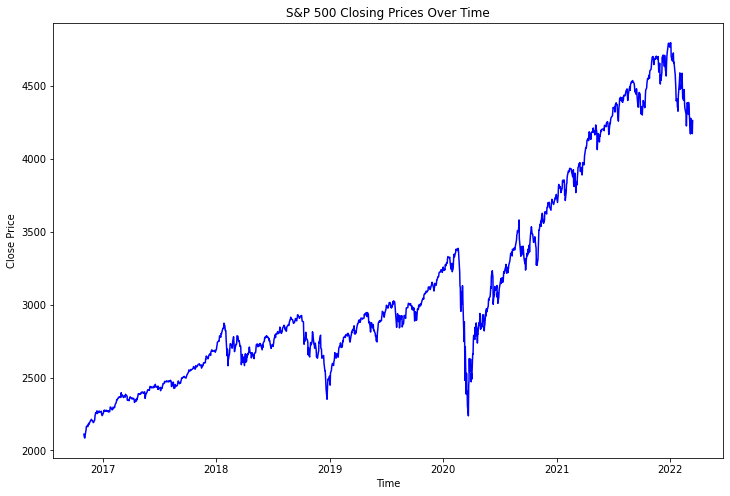

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(sp500_df["Date"], sp500_df["Close"], color = 'blue')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title("S&P 500 Closing Prices Over Time")
plt.show()

### Visualization of Betting Data

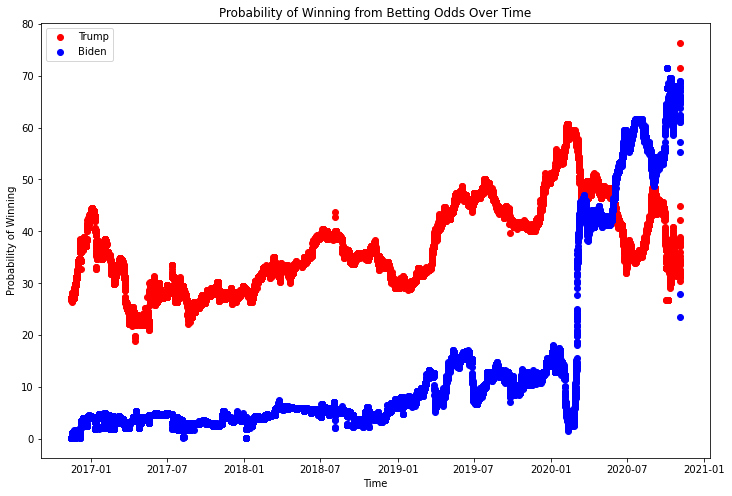

In [ ]:
plt.figure(figsize=(12, 8))
trump_line = plt.scatter(betting_df["timestampNY"], betting_df["Donald Trump Prob"], color = 'red', label='Trump')
biden_line = plt.scatter(betting_df["timestampNY"], betting_df["Joe Biden Prob"], color = 'blue', label='Biden')
plt.xlabel('Time')
plt.ylabel('Probability of Winning')
plt.title("Probability of Winning from Betting Odds Over Time")
plt.legend()
plt.show()

### Linear Regression 

We are creating a linear regression model between X = the odds of Donald Trump and y = S&P 500 Closing Prices.

In [ ]:
X = betdatamktclose_df[["Donald Trump"]]
y = betdatamktclose_df[["Close"]]
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

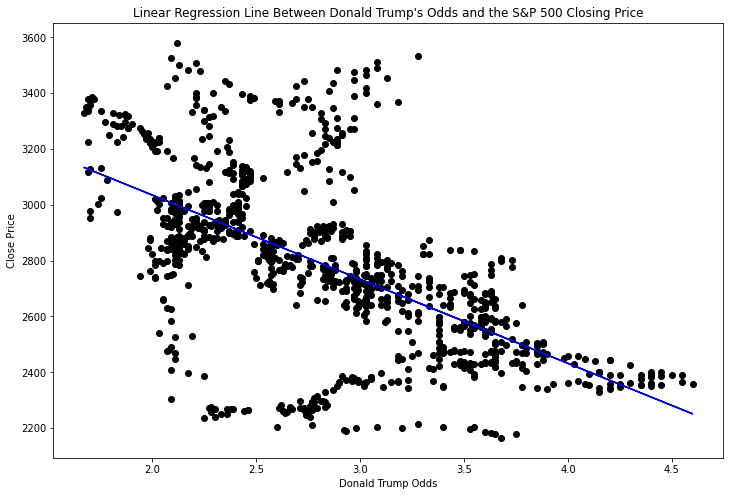

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(X, y, color = 'black')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.xlabel('Donald Trump Odds')
plt.ylabel('Close Price')
plt.title("Linear Regression Line Between Donald Trump's Odds and the S&P 500 Closing Price")
plt.show()

## Betting Probabilities and National Polling Probabilities

In this section, we wanted to know if the betting probabilities are comparable to the national polling probabilities. Generally, we believe that the betting probabilities will be more extreme than the national polling probablities. If a candidate is polling at 60% nationally, the betting probability will be near 100%.

We are cleaning the polling data by removing any candidates that are not Joe Biden or Donald Trump. We are changing the name from 'Joseph R. Biden Jr.' to 'Joe Biden'. We are dropping some irrelevant columns. 

In [ ]:
polling_df = pd.read_csv(dataset_dir + '/Polling Data/presidential_poll_averages_2020.csv')
polling_df = polling_df[(polling_df['candidate_name'] == 'Joseph R. Biden Jr.') | (polling_df['candidate_name'] == 'Donald Trump') ]
polling_df['candidate_name'] = polling_df['candidate_name'].apply(lambda x: 'Joe Biden' if (x == 'Joseph R. Biden Jr.') else x)
polling_df = polling_df.dropna().drop(columns=['pct_estimate', 'cycle'])
polling_df['modeldate'] = pd.to_datetime(polling_df['modeldate'])

We are transforming the polling dataframe from one row per candidate to one row per date.


In [ ]:
polling_trump_df = polling_df[polling_df['candidate_name'] == 'Donald Trump'].copy().rename(columns={'pct_trend_adjusted': 'dt_pct_trend_adjusted'}).drop(columns=['candidate_name'])
polling_biden_df = polling_df[polling_df['candidate_name'] == 'Joe Biden'].copy().rename(columns={'pct_trend_adjusted': 'jb_pct_trend_adjusted'}).drop(columns=['candidate_name'])

polling_df = polling_trump_df.merge(polling_biden_df, left_on = ['state', 'modeldate'], right_on = ['state', 'modeldate'], how = 'outer')
polling_df

,state,modeldate,dt_pct_trend_adjusted,jb_pct_trend_adjusted
0,Wyoming,2020-11-03,62.31048,30.82599
1,Wisconsin,2020-11-03,43.70826,52.09584
2,West Virginia,2020-11-03,62.13716,33.51517
3,Washington,2020-11-03,36.44392,59.39408
4,Virginia,2020-11-03,41.90127,53.72101
...,...,...,...,...
10731,Connecticut,2020-02-27,34.58325,53.43380
10732,Colorado,2020-02-27,44.07662,46.62778
10733,California,2020-02-27,34.69761,58.83422
10734,Arizona,2020-02-27,48.07208,44.18120


We are selecting only the results from the national polls.

In [ ]:
national_polling_df = polling_df[polling_df['state'] == 'National'].copy()
national_polling_df

,state,modeldate,dt_pct_trend_adjusted,jb_pct_trend_adjusted
24,National,2020-11-03,43.40869,51.81667
80,National,2020-11-02,43.40869,51.81667
136,National,2020-11-01,43.50872,51.99525
192,National,2020-10-31,43.39307,51.99537
248,National,2020-10-30,43.22344,52.06568
...,...,...,...,...
10593,National,2020-03-02,45.58205,49.72105
10625,National,2020-03-01,45.57798,49.71992
10657,National,2020-02-29,45.57798,49.71992
10689,National,2020-02-28,45.56311,49.75305


We are joining the betting data with the national polling data. Since the betting data has probabilities per hour and the national polls have probabilites per day, the betting data probabilities are grouped on the date and the averaged.

In [ ]:
betting_dates_df = betting_df.groupby(by=['dateNY']).agg({'Donald Trump Prob': 'mean', 'Joe Biden Prob': 'mean'}).reset_index()
betting_polling_df = betting_dates_df.merge(national_polling_df, left_on = ['dateNY'], right_on = ['modeldate'])
betting_polling_df

,dateNY,Donald Trump Prob,Joe Biden Prob,state,modeldate,dt_pct_trend_adjusted,jb_pct_trend_adjusted
0,2020-02-27,58.881710,7.823025,National,2020-02-27,45.51636,49.33870
1,2020-02-28,58.794863,9.304725,National,2020-02-28,45.56311,49.75305
2,2020-02-29,57.856682,9.681313,National,2020-02-29,45.57798,49.71992
3,2020-03-01,57.157635,12.134725,National,2020-03-01,45.57798,49.71992
4,2020-03-02,56.930050,16.387678,National,2020-03-02,45.58205,49.72105
...,...,...,...,...,...,...,...
246,2020-10-30,34.042401,65.739498,National,2020-10-30,43.22344,52.06568
247,2020-10-31,33.472574,66.194900,National,2020-10-31,43.39307,51.99537
248,2020-11-01,33.660555,66.019456,National,2020-11-01,43.50872,51.99525
249,2020-11-02,33.940499,65.881667,National,2020-11-02,43.40869,51.81667


### Visualizations of National Polling Data

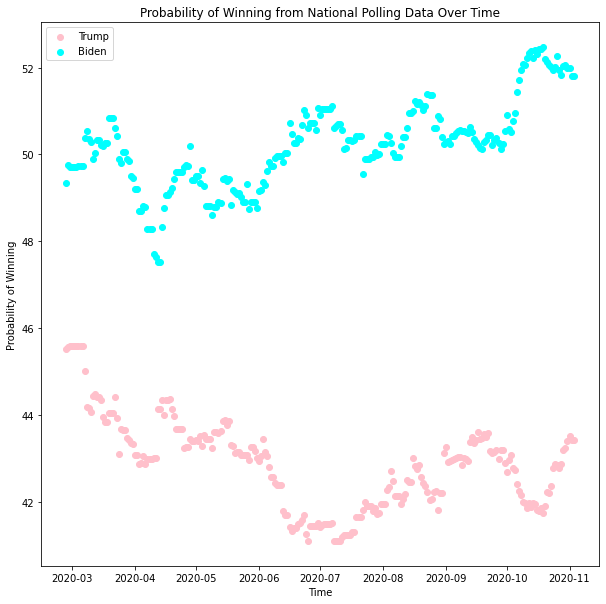

In [ ]:
plt.figure(figsize=(10,10))

plt.scatter(national_polling_df['modeldate'], national_polling_df['dt_pct_trend_adjusted'], color = 'pink', label='Trump')
plt.scatter(national_polling_df['modeldate'], national_polling_df['jb_pct_trend_adjusted'], color = 'aqua', label='Biden')
plt.xlabel('Time')
plt.ylabel('Probability of Winning')
plt.title('Probability of Winning from National Polling Data Over Time')
plt.legend()
plt.show()


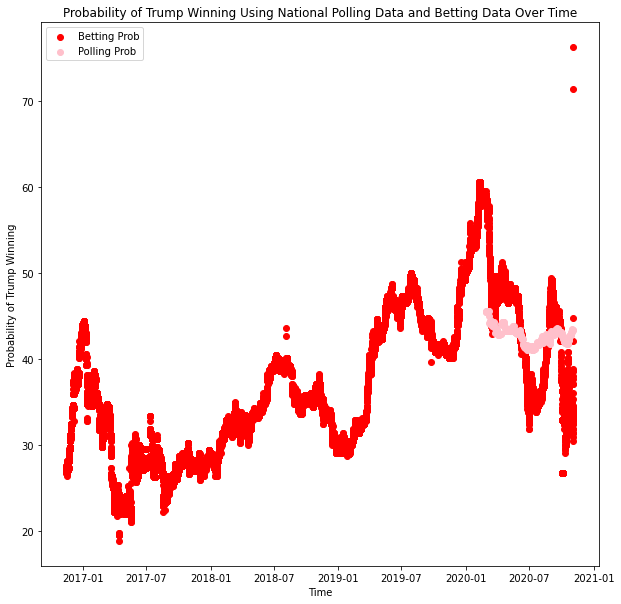

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(betting_df['timestampNY'], betting_df['Donald Trump Prob'], color = 'red', label='Betting Prob')
plt.scatter(national_polling_df['modeldate'], national_polling_df['dt_pct_trend_adjusted'], color = 'pink', label='Polling Prob')
plt.xlabel('Time')
plt.ylabel('Probability of Trump Winning')
plt.title('Probability of Trump Winning Using National Polling Data and Betting Data Over Time')
plt.legend()
plt.show()

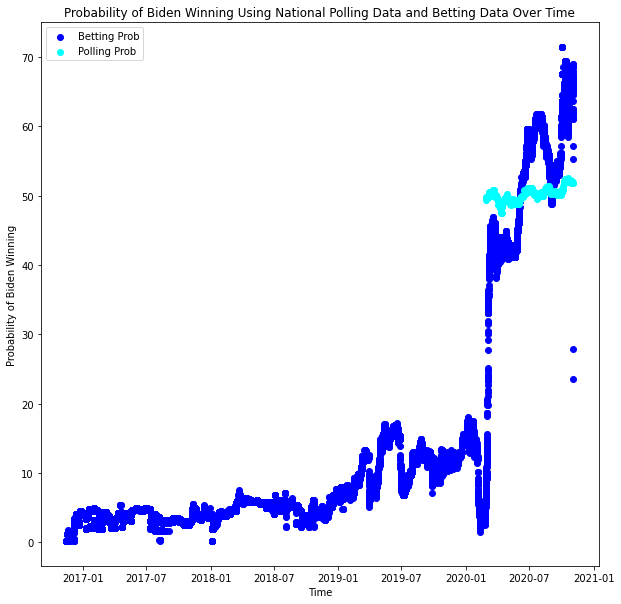

In [ ]:
plt.figure(figsize=(10,10))

plt.scatter(betting_df['timestampNY'], betting_df['Joe Biden Prob'], color = 'blue', label='Betting Prob')
plt.scatter(national_polling_df['modeldate'], national_polling_df['jb_pct_trend_adjusted'], color = 'aqua', label='Polling Prob')
plt.xlabel('Time')
plt.ylabel('Probability of Biden Winning')
plt.title('Probability of Biden Winning Using National Polling Data and Betting Data Over Time')
plt.legend()
plt.show()

### Linear Regression

We are creating a linear regression model between X = Trump betting probability and y = Trump national polling probability.


In [ ]:
X = betting_polling_df[['Donald Trump Prob']]
y = betting_polling_df[['dt_pct_trend_adjusted']]
trump_lr = LinearRegression()
trump_lr.fit(X, y)

LinearRegression()

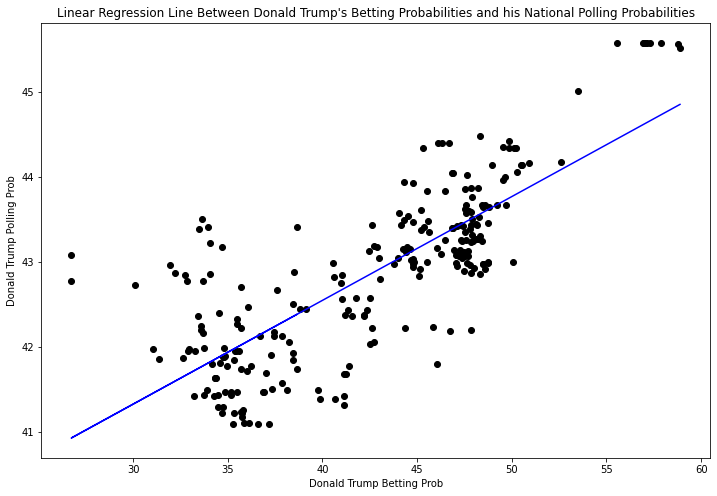

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(X, y, color = 'black')
plt.plot(X, trump_lr.predict(X), color = 'blue')
plt.xlabel('Donald Trump Betting Prob')
plt.ylabel('Donald Trump Polling Prob')
plt.title("Linear Regression Line Between Donald Trump's Betting Probabilities and his National Polling Probabilities")
plt.show()

We are creating a linear regression model between X = Biden betting probability and y = Biden national polling probability.

In [ ]:
X = betting_polling_df[['Joe Biden Prob']]
y = betting_polling_df[['jb_pct_trend_adjusted']]

biden_lr = LinearRegression()
biden_lr.fit(X, y)

LinearRegression()

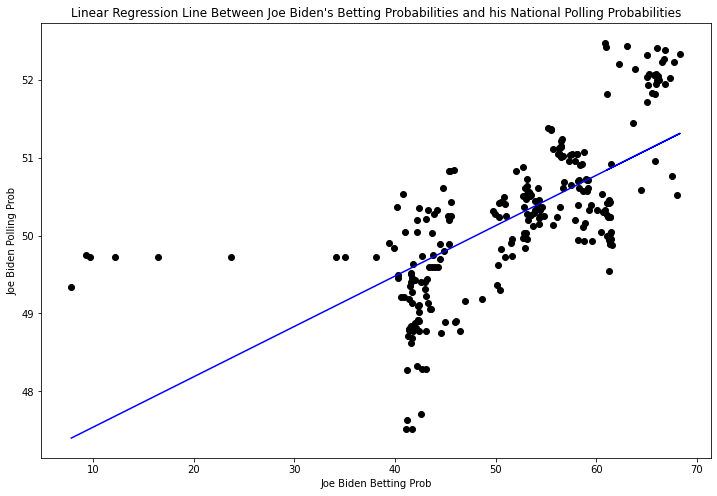

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(X, y, color = 'black')
plt.plot(X, biden_lr.predict(X), color = 'blue')
plt.xlabel('Joe Biden Betting Prob')
plt.ylabel('Joe Biden Polling Prob')
plt.title("Linear Regression Line Between Joe Biden's Betting Probabilities and his National Polling Probabilities")
plt.show()

## Polling Data of Swing States and Betting Data

Using the visualizations between the national polling probabilities and betting probabilities, it seems that they are somewhat related. The greatest indication being that Donald Trump's betting probability drops significatly around July of 2020, and his national polling probability also dips. However, they are not very related, so we thought maybe that the polling probabilites of the swing states and the betting probabilities would be more interesting. After all, most elections are determined by the swing states (like Pennsylvania). 

We are extracting only those polls from swing states and adding an electoral votes column. From this [Wikipedia page](https://en.wikipedia.org/wiki/Swing_state), it states "Areas considered battlegrounds in the 2020 election were Arizona, Florida, Georgia, Iowa, Maine's 2nd congressional district, Michigan, Minnesota, Nebraska's 2nd congressional district, Nevada, New Hampshire, North Carolina, Ohio, Pennsylvania, Texas and Wisconsin, ... "

In [ ]:
swing_states = {'Arizona' : 11, 'Florida': 29, 'Georgia': 16, 'Iowa': 6, 'ME-2': 1, 'Michigan': 16, 'Minnesota': 10, 
                'NE-2': 1, 'Nevada': 6, 'New Hampshire': 4, 'North Carolina': 15, 'Ohio': 18, 'Pennsylvania': 20, 
                'Texas': 38, 'Wisconsin': 10}

swing_polling_df = polling_df[polling_df['state'].isin(swing_states)].copy()
swing_polling_df['electoral_votes'] = swing_polling_df['state'].apply(lambda x: swing_states[x])

We are aggregating the swing states polling probabilities by grouping on the date and using a weighted mean based on the number of electoral votes per state.

In [ ]:
wm = lambda x: np.average(x, weights=swing_polling_df.loc[x.index, "electoral_votes"])
swing_polling_df = swing_polling_df.groupby(by=['modeldate']).agg(donald_trump_prob=("dt_pct_trend_adjusted", wm), joe_biden_prob=("jb_pct_trend_adjusted", wm)).reset_index()
swing_polling_df

,modeldate,donald_trump_prob,joe_biden_prob
0,2020-02-27,47.037213,46.789326
1,2020-02-28,47.082499,46.950381
2,2020-02-29,47.138239,46.928574
3,2020-03-01,47.138239,46.928574
4,2020-03-02,47.169785,46.852007
...,...,...,...
246,2020-10-30,45.859079,48.851793
247,2020-10-31,45.981986,48.913857
248,2020-11-01,46.152303,48.993385
249,2020-11-02,46.306748,49.088215


### Visualizations of Swing States Polling Data

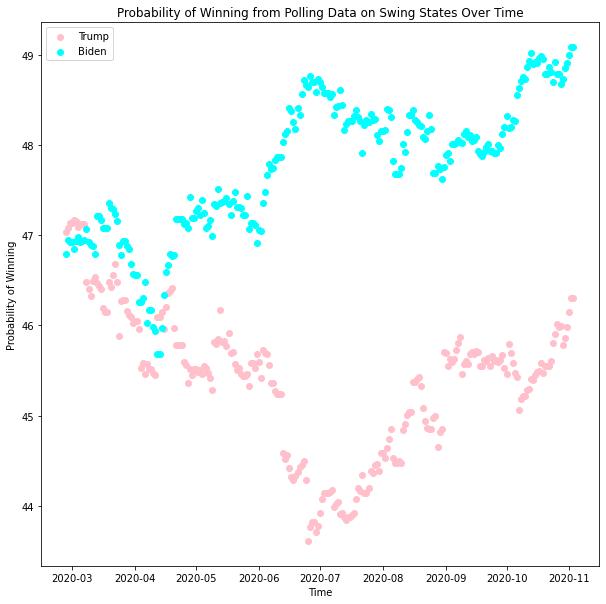

In [ ]:
plt.figure(figsize=(10,10))

plt.scatter(swing_polling_df['modeldate'], swing_polling_df['donald_trump_prob'], color = 'pink', label='Trump')
plt.scatter(swing_polling_df['modeldate'], swing_polling_df['joe_biden_prob'], color = 'aqua', label='Biden')
plt.xlabel('Time')
plt.ylabel('Probability of Winning')
plt.title('Probability of Winning from Polling Data on Swing States Over Time')
plt.legend()
plt.show()

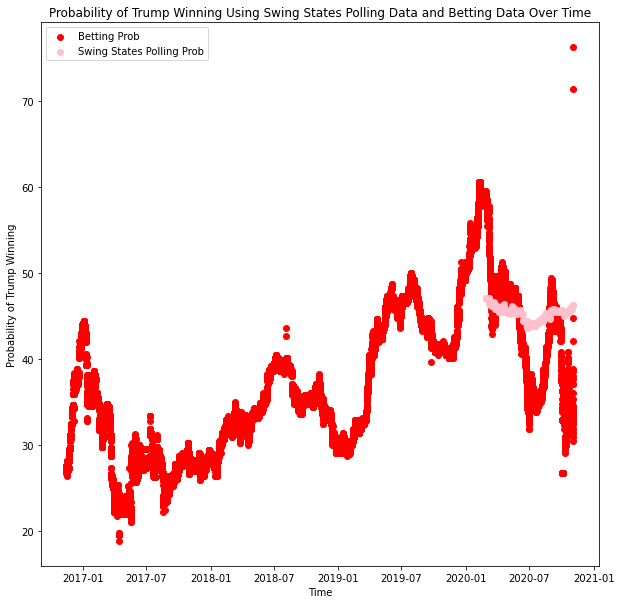

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(betting_df['timestampNY'], betting_df['Donald Trump Prob'], color = 'red', label='Betting Prob')
plt.scatter(swing_polling_df['modeldate'], swing_polling_df['donald_trump_prob'], color = 'pink', label='Swing States Polling Prob')
plt.xlabel('Time')
plt.ylabel('Probability of Trump Winning')
plt.title('Probability of Trump Winning Using Swing States Polling Data and Betting Data Over Time')
plt.legend()
plt.show()

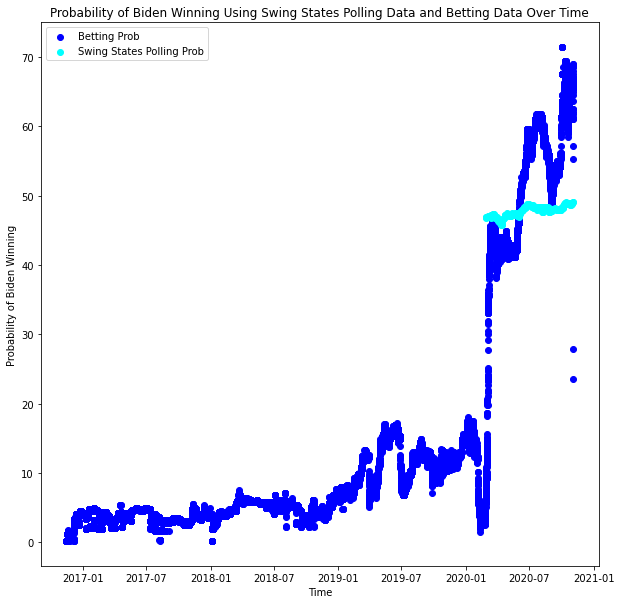

In [ ]:
plt.figure(figsize=(10,10))

plt.scatter(betting_df['timestampNY'], betting_df['Joe Biden Prob'], color = 'blue', label='Betting Prob')
plt.scatter(swing_polling_df['modeldate'], swing_polling_df['joe_biden_prob'], color = 'aqua', label='Swing States Polling Prob')
plt.xlabel('Time')
plt.ylabel('Probability of Biden Winning')
plt.title('Probability of Biden Winning Using Swing States Polling Data and Betting Data Over Time')
plt.legend()
plt.show()

Since we didn't see much of a difference between the swing states polling data and the national polling data, we decided to not create another linear regression model.

##Sector Data

Now, we'll look at individual sector data. We believed that sectors would be affected by who's perceived to be the favorite in the election. Certain sectors like technology and industry seem like they may be affected by the election.

We are reading all of the hourly sector data into a dataframe per sector, and then merging them all together into one huge dataframe that contains all the sector data. We are only keeping data between 2016-11-14 07:00:00 and 2020-11-03 23:00:00 to align with the betting data.

In [ ]:
def get_finance_data(initial_path, finance_dict, start_time, end_time):
  finance_df_list = []
  for file in finance_dict: 
    item = finance_dict[file]
    df = pd.read_csv(initial_path + file, header=None, names=['DateTime', item + '_Open', item + '_High', item + '_Low', item + '_Close', item + '_Volume'])
    df['DateTime'] = pd.to_datetime(df['DateTime'])
    df = df[(df['DateTime'] >= start_time) & (df['DateTime'] <= end_time)]
    finance_df_list.append(df)
  finance_df = reduce(lambda x, y: pd.merge(x, y, on = 'DateTime', how = 'outer'), finance_df_list)
  return finance_df

sector_path = dataset_dir + '/Financial Data/Sector Funds/'
sectors_dict = {'XLE_1hour.txt': 'XLE', 'XLRE_1hour.txt': 'XLRE', 'XLU_1hour.txt': 'XLU', 'XLP_1hour.txt': 'XLP', 
           'XLK_1hour.txt': 'XLK', 'XLB_1hour.txt': 'XLB', 'XLF_1hour.txt': 'XLF', 'XLY_1hour.txt': 'XLY',
           'XLI_1hour.txt': 'XLI', 'XLC_1hour.txt': 'XLC', 'SLV_1hour.txt': 'SLV'}
sectors_df = get_finance_data(sector_path, sectors_dict, np.datetime64('2016-11-14 07:00:00'), np.datetime64('2020-11-03 23:00:00'))

### Visualizing Sector Data

One interesting thing to note is that all sectors dip when the COVID-19 pandemic begins around March, 2020.

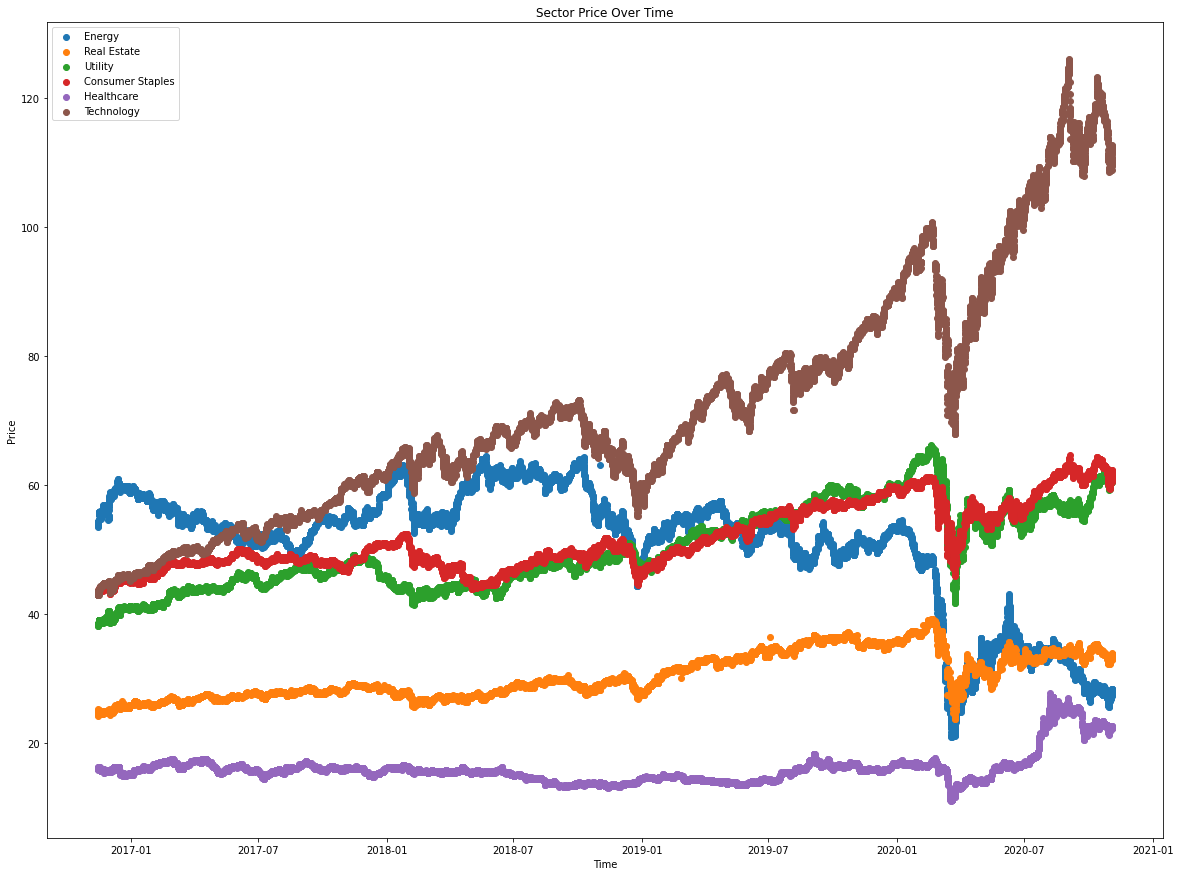

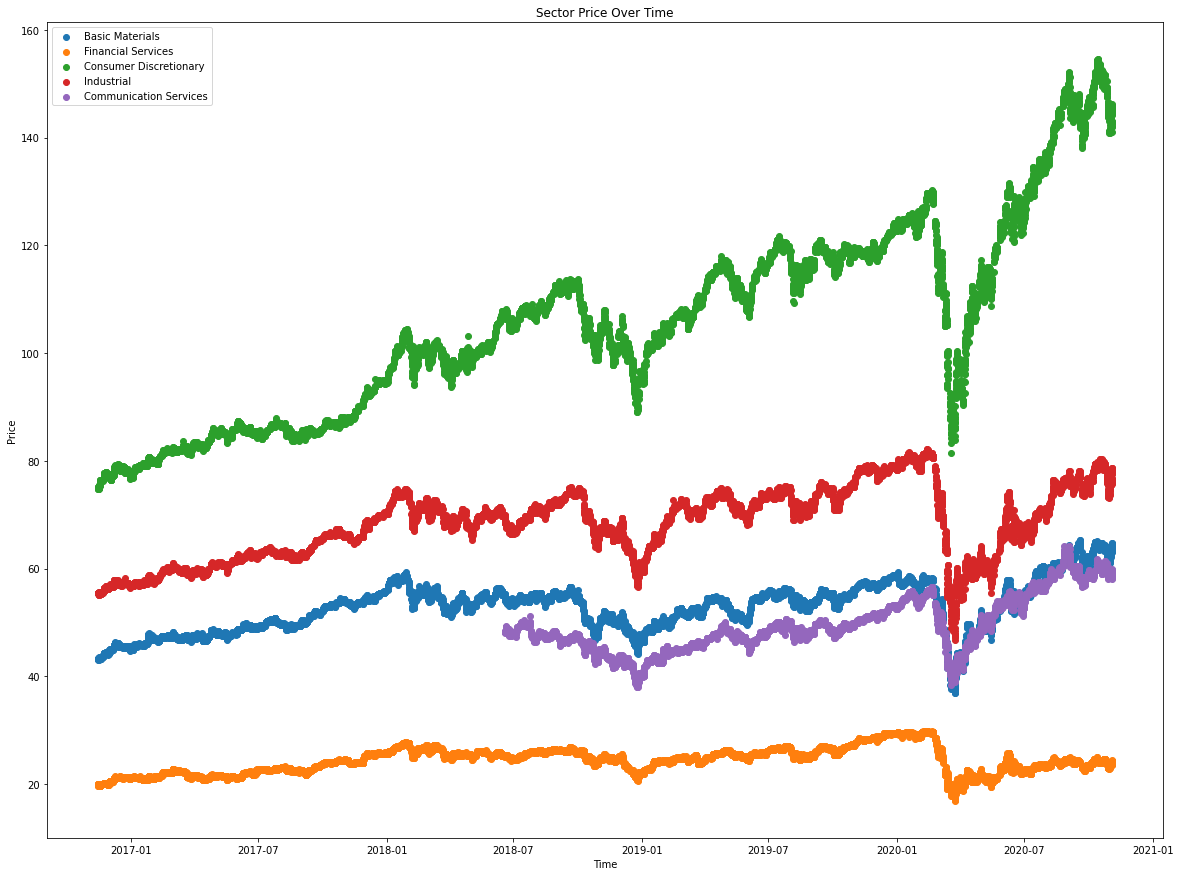

In [ ]:
def plot_sectors(sectors_df, sectors_col):
  plt.figure(figsize=(20,15))
  for s in sectors_col:
    plt.scatter(sectors_df['DateTime'], sectors_df[s], label=sectors_col[s])
  plt.xlabel('Time')
  plt.ylabel('Price')
  plt.title('Sector Price Over Time')
  plt.legend()
  plt.show()


sectors_col1 = {'XLE_Close': 'Energy', 'XLRE_Close': 'Real Estate' , 'XLU_Close': 'Utility', 'XLP_Close': 'Consumer Staples', 
                'SLV_Close': 'Healthcare', 'XLK_Close': 'Technology' }
           
sectors_col2 = {'XLB_Close': 'Basic Materials', 'XLF_Close': 'Financial Services', 'XLY_Close': 'Consumer Discretionary',
                'XLI_Close': 'Industrial', 'XLC_Close': 'Communication Services'}
plot_sectors(sectors_df, sectors_col1)
plot_sectors(sectors_df, sectors_col2)

##Wells Fargo Candidate Profile

Wells Fargo created a profile for Biden and Trump, including stocks that they predicted would do well if that candidate was elected. We believed that individual stocks are unlikely to be affected by the election because other immediate factors usually cause stock prices to fluctuate much more. However, we still decided to look into it.

Again, we are reading all of the hourly stock data into a dataframe per stock, and then merging them all together into one huge dataframe that contains all the stock data. We are only keeping data between 2016-11-14 07:00:00 and 2020-11-03 23:00:00 to align with the betting data.

In [ ]:
sm_biden_path = dataset_dir + '/Financial Data/Biden Portfolio/'


biden_stocks_dict = {'FB_1hour.txt': 'FB', 'TSLA_1hour.txt': 'TSLA', 'AMZN_1hour.txt': 'AMZN', 
                     'SBUX_1hour.txt': 'SBUX', 'MSFT_1hour.txt': 'MSFT','AAPL_1hour.txt': 'AAPL', 'NVDA_1hour.txt': 'NVDA',
                     'PYPL_1hour.txt': 'PYPL', 'AMT_1hour.txt': 'AMT', 'PLD_1hour.txt': 'PLD', 'EQIX_1hour.txt': 'EQIX', 
                     'CCI_1hour.txt': 'CCI', 'NEE_1hour.txt': 'NEE', 'AGR_1hour.txt': 'AGR', 'GOOGL_1hour.txt': 'GOOGL'}

biden_stocks_df = get_finance_data(sm_biden_path, biden_stocks_dict, np.datetime64('2016-11-14 07:00:00'), np.datetime64('2020-11-03 23:00:00'))

In [ ]:
sm_trump_path = dataset_dir + '/Financial Data/Trump Portfolio/'


trump_stocks_dict = {'COP_1hour.txt': 'COP', 'PXD_1hour.txt': 'PXD', 'GS_1hour.txt': 'GS', 
                     'PNC_1hour.txt': 'PNC', 'JNJ_1hour.txt': 'JNJ','BA_1hour.txt': 'BA', 'LMT_1hour.txt': 'LMT',
                     'ETN_1hour.txt': 'ETN', 'CAT_1hour.txt': 'CAT', 'DE_1hour.txt': 'DE', 'MA_1hour.txt': 'MA',
                     'V_1hour.txt': 'V', 'FMC_1hour.txt': 'FMC', 'PPG_1hour.txt': 'PPG', 'MOS_1hour.txt': 'MOS'}

trump_stocks_df = get_finance_data(sm_trump_path, trump_stocks_dict, np.datetime64('2016-11-14 07:00:00'), np.datetime64('2020-11-03 23:00:00'))

### Visualizations of Biden Portfolio

As expected, they all dip around the start of the COVID-19 pandemic in March, 2020.

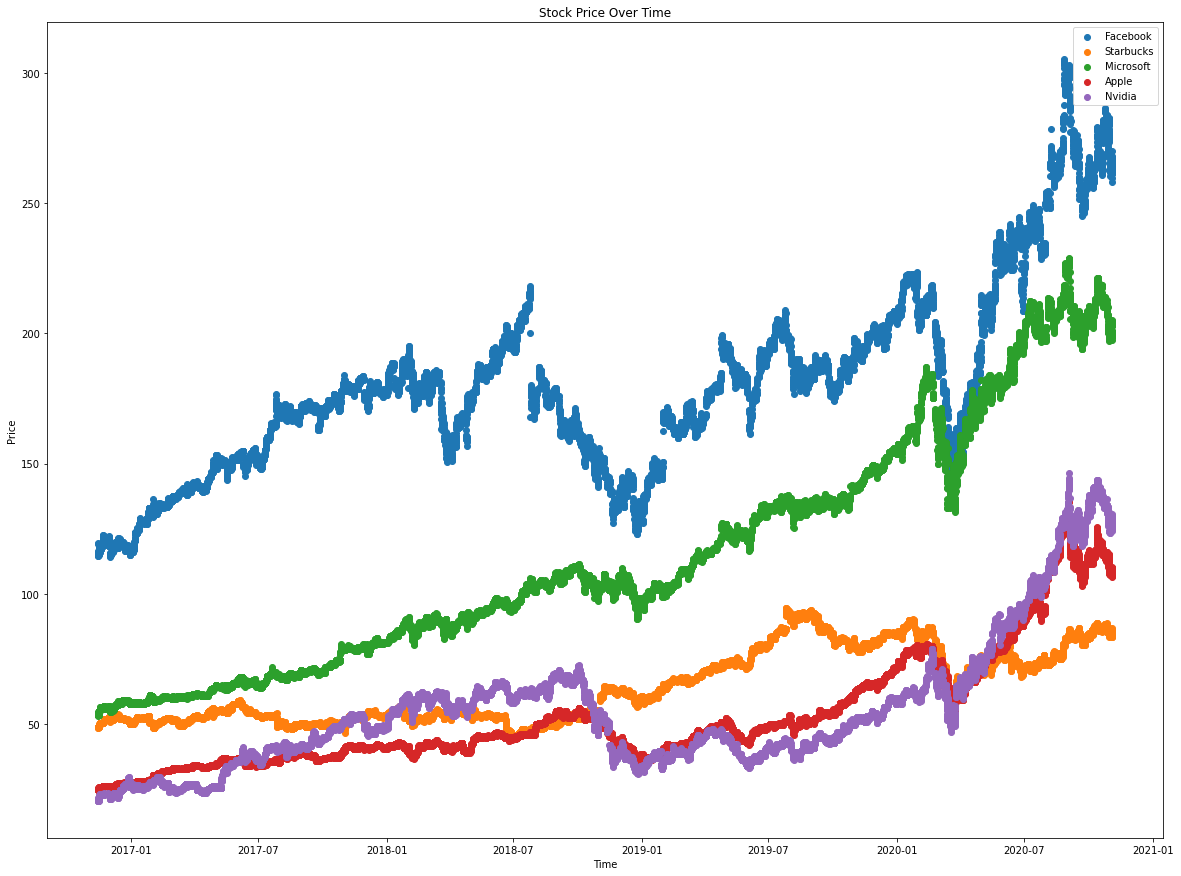

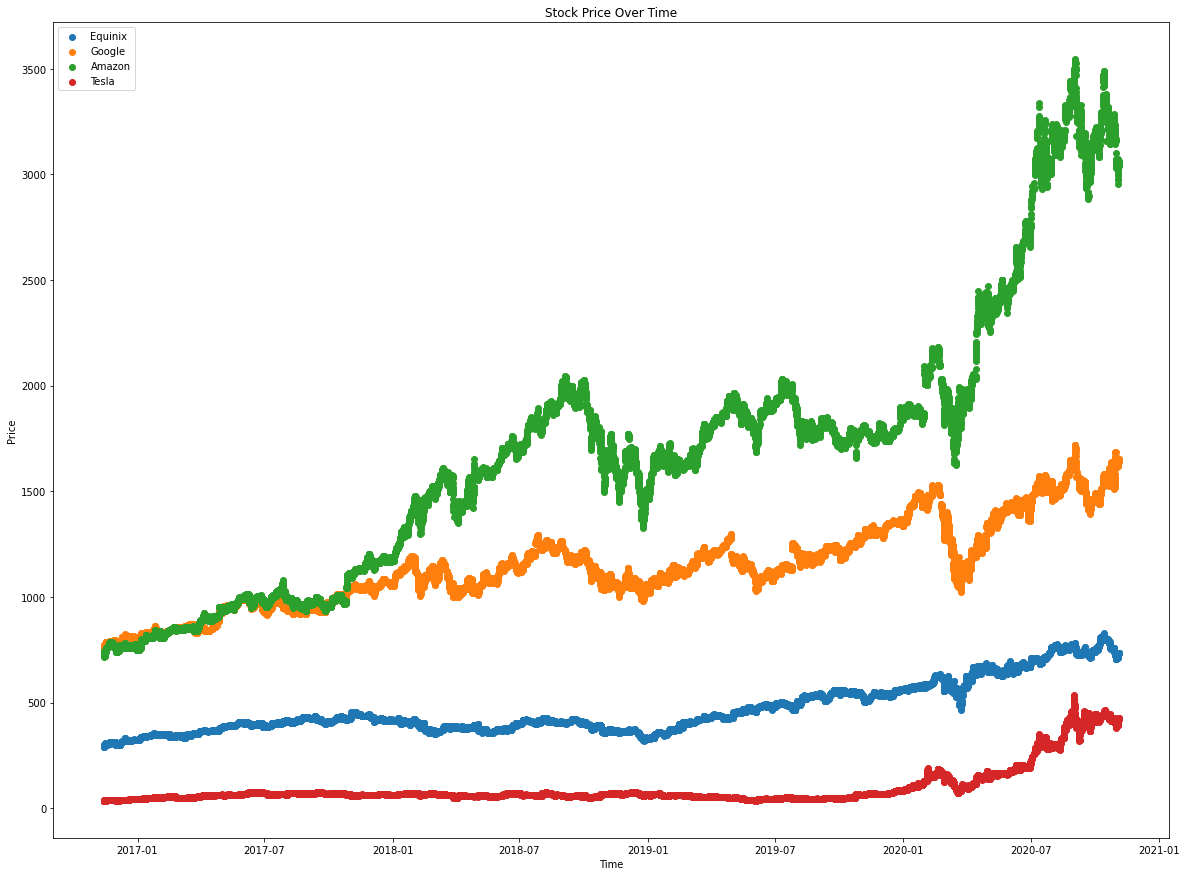

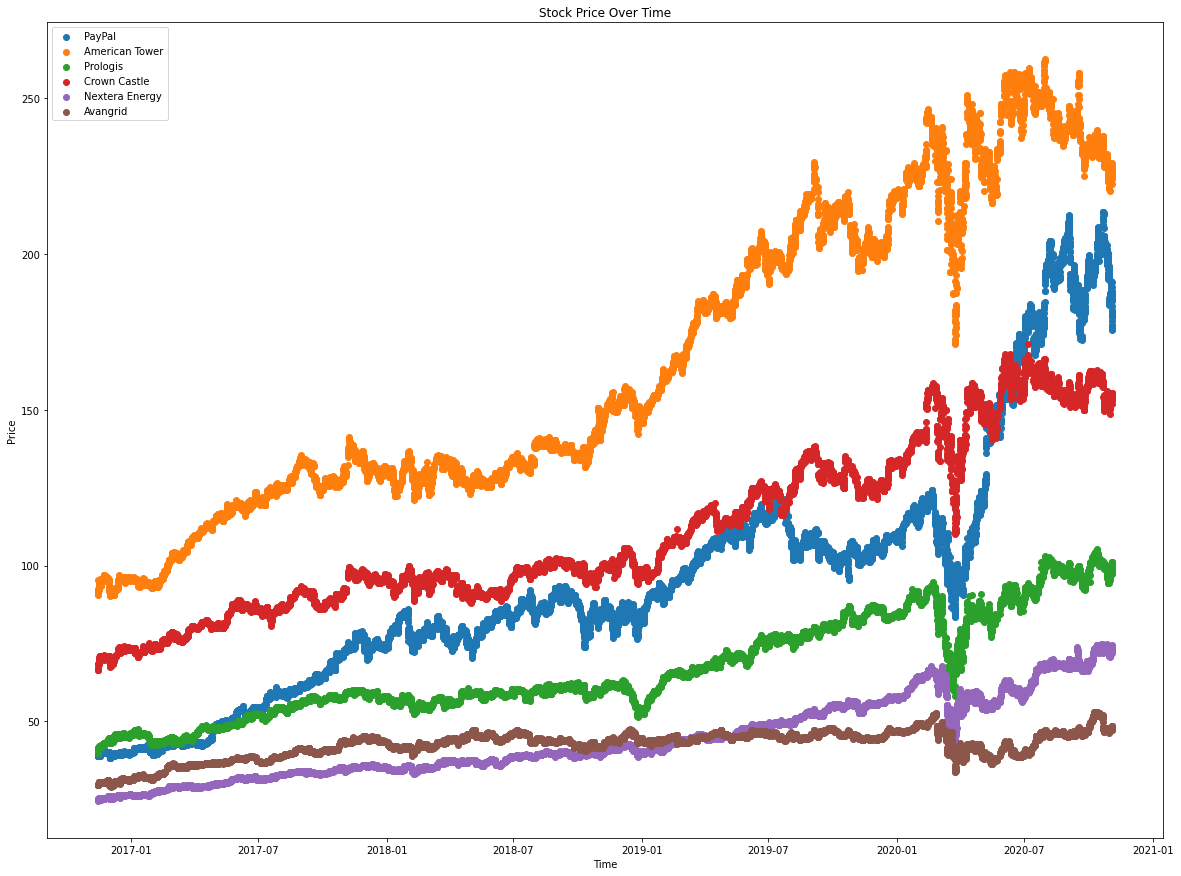

In [ ]:
def plot_stocks(stocks_df, stocks_col):
  plt.figure(figsize=(20,15))
  for s in stocks_col:
    plt.scatter(stocks_df['DateTime'], stocks_df[s], label=stocks_col[s])
  plt.xlabel('Time')
  plt.ylabel('Price')
  plt.title('Stock Price Over Time')
  plt.legend()
  plt.show()

biden_stocks_col1 = {'FB_Close': 'Facebook', 'SBUX_Close': 'Starbucks', 'MSFT_Close': 'Microsoft', 
                     'AAPL_Close': 'Apple' , 'NVDA_Close': 'Nvidia' }

biden_stocks_col2 = {'EQIX_Close': 'Equinix', 'GOOGL_Close': 'Google', 'AMZN_Close': 'Amazon', 'TSLA_Close': 'Tesla'}
                     
biden_stocks_col3 = {'PYPL_Close': 'PayPal', 'AMT_Close': 'American Tower', 'PLD_Close': 'Prologis', 
                     'CCI_Close': 'Crown Castle', 'NEE_Close': 'Nextera Energy', 'AGR_Close': 'Avangrid'}

plot_stocks(biden_stocks_df, biden_stocks_col1)
plot_stocks(biden_stocks_df, biden_stocks_col2)
plot_stocks(biden_stocks_df, biden_stocks_col3)

### Visualizations of Trump Portfolio

Again, they all dip around the start of the COVID-19 pandemic in March, 2020, especially Boeing.

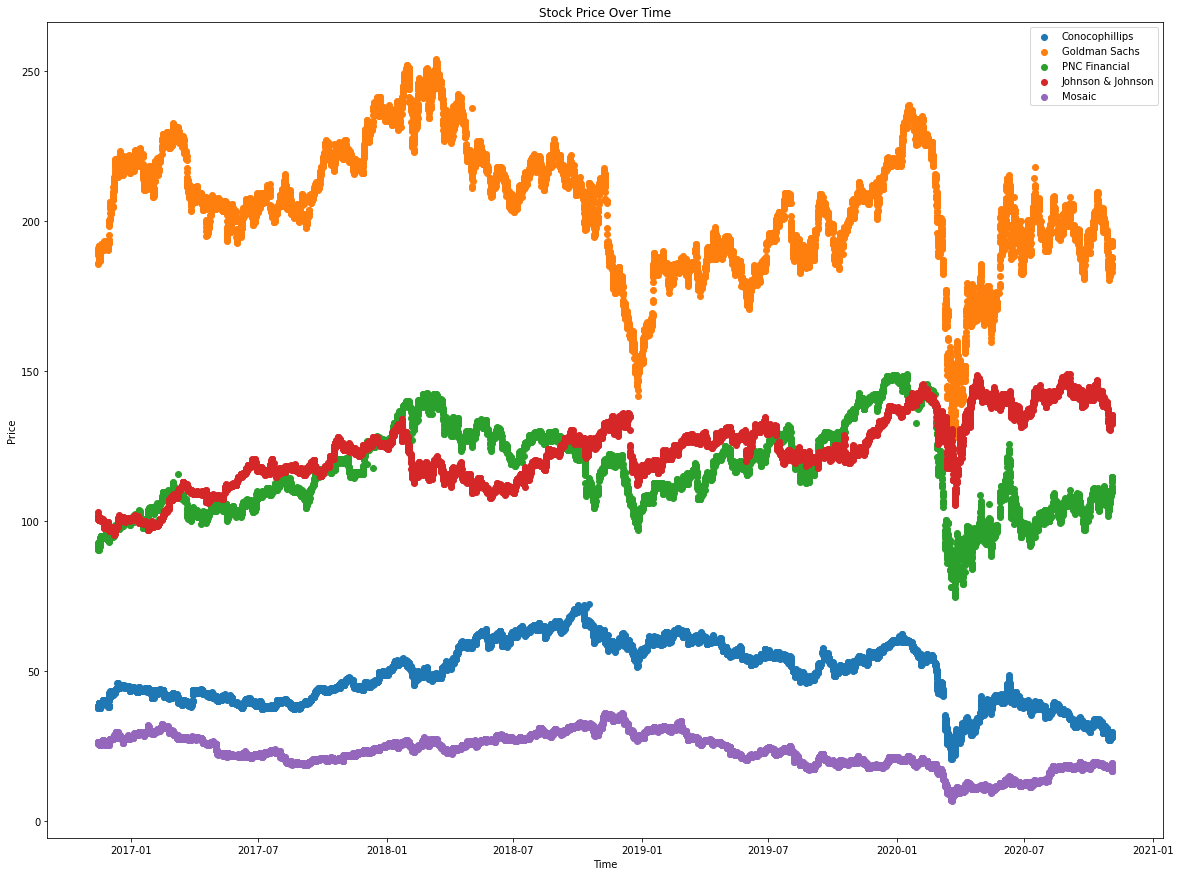

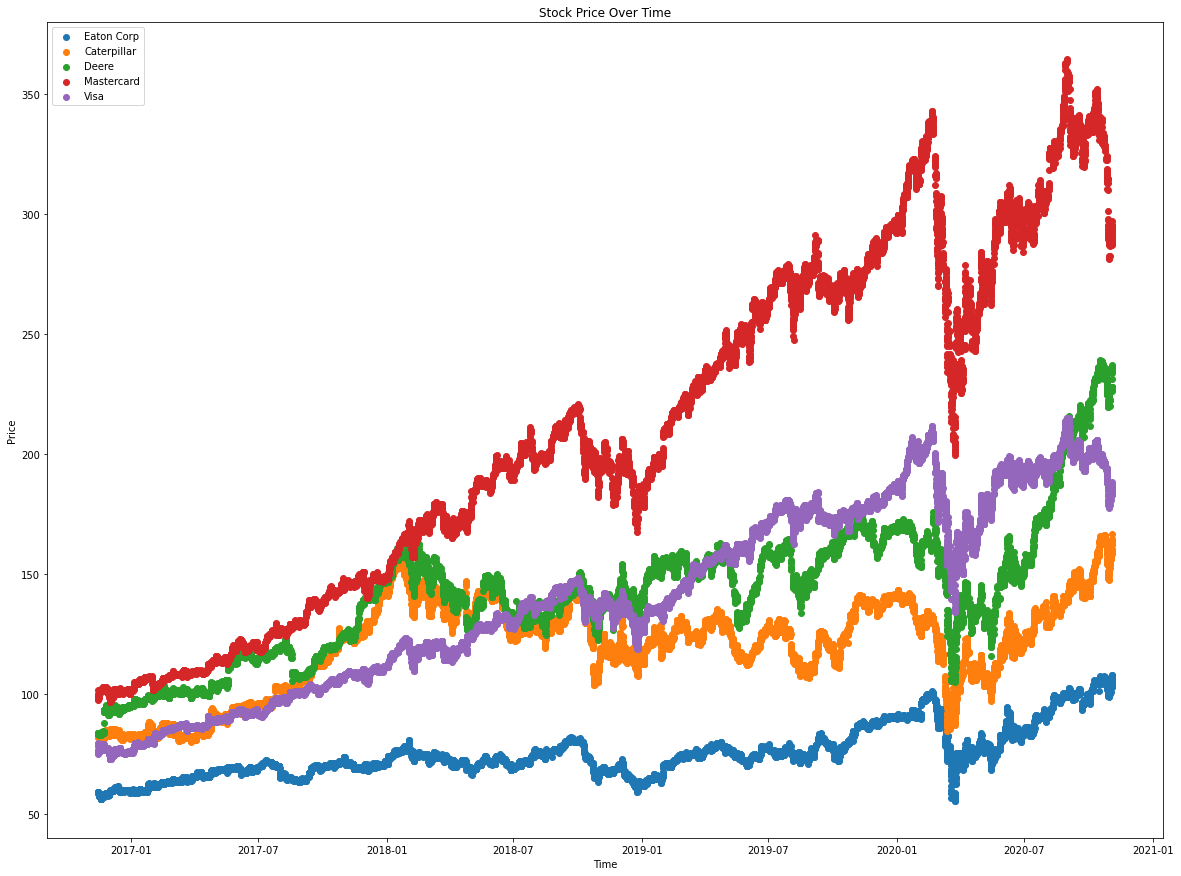

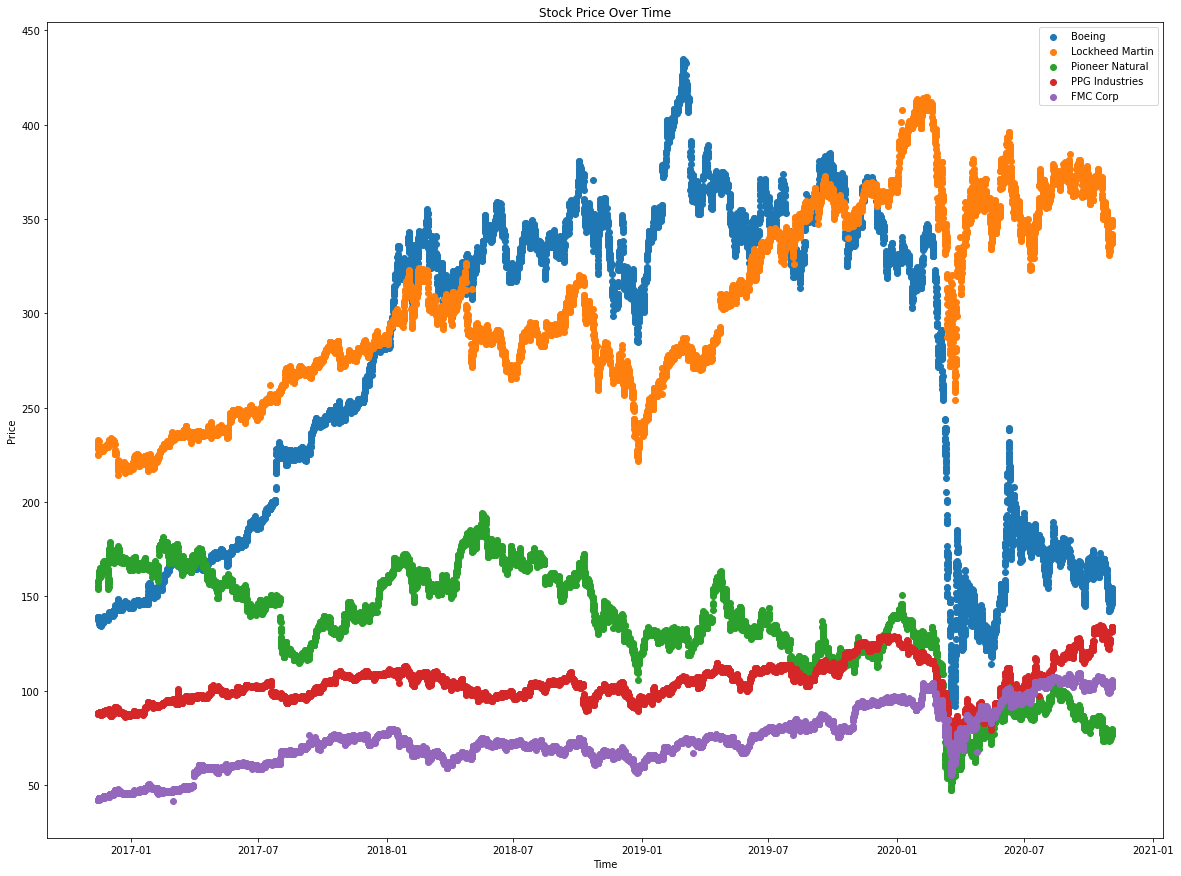

In [ ]:
trump_stocks_col1 = {'COP_Close': 'Conocophillips', 'GS_Close': 'Goldman Sachs', 
                    'PNC_Close': 'PNC Financial', 'JNJ_Close': 'Johnson & Johnson', 'MOS_Close': 'Mosaic' }


trump_stocks_col2 = {'ETN_Close': 'Eaton Corp', 'CAT_Close': 'Caterpillar', 'DE_Close': 'Deere', 
                     'MA_Close': 'Mastercard', 'V_Close': 'Visa'}

trump_stocks_col3 = {'BA_Close': 'Boeing', 'LMT_Close': 'Lockheed Martin', 'PXD_Close': 'Pioneer Natural',
                     'PPG_Close': 'PPG Industries', 'FMC_Close': 'FMC Corp'}

plot_stocks(trump_stocks_df, trump_stocks_col1)
plot_stocks(trump_stocks_df, trump_stocks_col2)
plot_stocks(trump_stocks_df, trump_stocks_col3)

# Predicting Sector Stock Prices

In this section we will use previous data to predict sector stock prices.
We only used XLE sector because of the runtime.

User can adopt the model to predict the prices of their own stocks whenever they want.

(Adopted and learned from https://www.dataquest.io/blog/portfolio-project-predicting-stock-prices-using-pandas-and-scikit-learn/ to our model)

## Random Forest Classifier



We will first create a random forest classification model, and set min_samples_split high to ensure we don't overfit the data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

model = RandomForestClassifier(n_estimators=100, min_samples_split=200, random_state=1)


sectors_df

,DateTime,XLE_Open,XLE_High,XLE_Low,XLE_Close,XLE_Volume,XLRE_Open,XLRE_High,XLRE_Low,XLRE_Close,...,XLC_Open,XLC_High,XLC_Low,XLC_Close,XLC_Volume,SLV_Open,SLV_High,SLV_Low,SLV_Close,SLV_Volume
0,2016-11-14 07:00:00,53.6177,53.7497,53.6177,53.7497,4176.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.33,16.340,16.30,16.320,12288.0
1,2016-11-14 08:00:00,53.7886,53.9517,53.5944,53.7497,32345.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.34,16.370,16.24,16.280,38820.0
2,2016-11-14 09:00:00,53.7886,54.0410,53.6798,53.8196,2387818.0,24.3485,24.5099,24.1746,24.2491,...,NaN,NaN,NaN,NaN,NaN,16.27,16.280,15.92,15.940,5820195.0
3,2016-11-14 10:00:00,53.8196,54.0993,53.7385,53.7684,1777064.0,24.2491,24.3982,24.2077,24.3402,...,NaN,NaN,NaN,NaN,NaN,15.94,16.060,15.81,15.869,7377345.0
4,2016-11-14 11:00:00,53.7730,53.7808,53.4662,53.5089,1832528.0,24.3568,24.5223,24.3402,24.5141,...,NaN,NaN,NaN,NaN,NaN,15.86,16.015,15.78,15.980,4860903.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15608,2020-07-31 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,22.45,22.500,22.43,22.480,59780.0
15609,2020-08-18 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,25.90,26.310,25.90,26.250,113941.0
15610,2020-09-23 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,21.73,21.930,21.62,21.910,51755.0
15611,2020-10-09 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,22.57,22.600,22.56,22.600,20500.0


### Setting up the Target

Target column will indicate if the stock went up or down on the given day.

In [ ]:
data= sectors_df[["XLE_Close"]]



data = data.rename(columns = {'XLE_Close':'XLE_Actual_Close'})



data["Target"] = sectors_df.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["XLE_Close"]
data.head()



,XLE_Actual_Close,Target
0,53.7497,NaN
1,53.7497,0.0
2,53.8196,1.0
3,53.7684,0.0
4,53.5089,0.0


### Shifting Data Forward

We are using shifting to move all rows forward one trading day.
That way we will predict future prices using past data.

In [ ]:
sectors_df_shifted = sectors_df.shift(1)
sectors_df_shifted.head()

,DateTime,XLE_Open,XLE_High,XLE_Low,XLE_Close,XLE_Volume,XLRE_Open,XLRE_High,XLRE_Low,XLRE_Close,...,XLC_Open,XLC_High,XLC_Low,XLC_Close,XLC_Volume,SLV_Open,SLV_High,SLV_Low,SLV_Close,SLV_Volume
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-11-14 07:00:00,53.6177,53.7497,53.6177,53.7497,4176.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.33,16.34,16.30,16.320,12288.0
2,2016-11-14 08:00:00,53.7886,53.9517,53.5944,53.7497,32345.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.34,16.37,16.24,16.280,38820.0
3,2016-11-14 09:00:00,53.7886,54.0410,53.6798,53.8196,2387818.0,24.3485,24.5099,24.1746,24.2491,...,NaN,NaN,NaN,NaN,NaN,16.27,16.28,15.92,15.940,5820195.0
4,2016-11-14 10:00:00,53.8196,54.0993,53.7385,53.7684,1777064.0,24.2491,24.3982,24.2077,24.3402,...,NaN,NaN,NaN,NaN,NaN,15.94,16.06,15.81,15.869,7377345.0


### Combining Our Data

We need to combine Target columns with the columns that we want to use to predict the target.

In [ ]:
predictors = ["XLE_Open", "XLE_High", "XLE_Low", "XLE_Close", "XLE_Volume"]
data= data.join(sectors_df_shifted[predictors]).iloc[1:]




### Training the Model

Let's clean our data from nulls (we decided because of the size of the data to drop nulls).

Other alternatives to dropping the nulls would be:


*   Value Imputation
*   KNN Imputation 



In [ ]:
data = data.dropna()
data

,XLE_Actual_Close,Target,XLE_Open,XLE_High,XLE_Low,XLE_Close,XLE_Volume
1,53.7497,0.0,53.6177,53.7497,53.6177,53.7497,4176.0
2,53.8196,1.0,53.7886,53.9517,53.5944,53.7497,32345.0
3,53.7684,0.0,53.7886,54.0410,53.6798,53.8196,2387818.0
4,53.5089,0.0,53.8196,54.0993,53.7385,53.7684,1777064.0
5,53.6565,1.0,53.7730,53.7808,53.4662,53.5089,1832528.0
...,...,...,...,...,...,...,...
12853,27.5664,0.0,27.3890,27.6505,27.3797,27.6178,3917896.0
12854,27.6318,1.0,27.6178,27.7532,27.4264,27.5664,8161498.0
12855,27.6411,1.0,27.5758,27.6318,27.4264,27.6318,152689.0
12856,27.6318,0.0,27.6411,27.6411,27.5758,27.6411,2747.0


As we have 12857 rows, we will use 80% of the data for train, and last 20% for test.

Therefore, we will predict last 2571 rows, and use all the data except last 2571 rows to do the prediction on the sector stock.



In [ ]:
train = data.iloc[:-2571]
test = data.iloc[-2571:]

model.fit(train[predictors], train["Target"])



RandomForestClassifier(min_samples_split=200, random_state=1)

### Measuring the Error

Let's check how accurate our model is!

In [ ]:
from sklearn.metrics import precision_score

# Evaluate error of predictions
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.4666666666666667

Our model is accurate 46.67% of time, which is worse than random guessing.

To increase accuracy one can:

*   Add more estimators in Random Forest Classifier
*   Undersample majority class (feasible because we have lots of data)
*.  Oversample minoity class

But let's visualize our results!







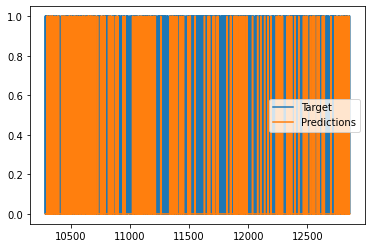

In [ ]:
combined = pd.concat({"Target": test["Target"],"Predictions": preds}, axis=1)
combined.plot()

We can see that target and predictions are all over the place, and that we definitely can improve our model!

## Backtesting

There is lots of room for the improvement in our model. So, let's jump right into it! 

Stock markets have bad and good days, and we don't want to predict the data based on one or the other. 

To test on more days, we will use backtesting. 

We will train model every 250 rows. (it is better when the number is lower, but for speed purposes we set the number high)

In [ ]:
i = 2571
step = 250

train = data.iloc[0:i].copy()
test = data.iloc[i:(i+step)].copy()
model.fit(train[predictors], train["Target"])
preds = model.predict(test[predictors])

### Predicting Probabilities

Let's adjust our precision, and predict that stock price will confidently go up when the threshold is 0.6. 

We will use predict_proba method for this.

In [ ]:
preds = model.predict_proba(test[predictors])[:,1]
preds = pd.Series(preds, index=test.index)
preds[preds > .6] = 1
preds[preds<=.6] = 0
preds.head()

2572    0.0
2573    0.0
2574    0.0
2575    0.0
2576    0.0
dtype: float64

### Pulling it into a Loop

Let's iterate throughout entire dataset by using the loop. 

In [ ]:
predictions = []
# Loop over the dataset in increments
for i in range(2571, data.shape[0], step):
    # Split into train and test sets
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()

    # Fit the random forest model
    model.fit(train[predictors], train["Target"])

    # Make predictions
    preds = model.predict_proba(test[predictors])[:,1]
    preds = pd.Series(preds, index=test.index)
    preds[preds > .6] = 1
    preds[preds<=.6] = 0

    # Combine predictions and test values
    combined = pd.concat({"Target": test["Target"],"Predictions": preds}, axis=1)

    predictions.append(combined)

predictions[0].head()

,Target,Predictions
2572,1.0,0.0
2573,1.0,0.0
2574,0.0,0.0
2575,0.0,0.0
2576,1.0,0.0


### Creating a backtesting function

This function will make predictions across whole dataset.

In [ ]:
def backtest(data, model, predictors, start=2571, step=250):
    predictions = []
    # Loop over the dataset in increments
    for i in range(start, data.shape[0], step):
        # Split into train and test sets
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()

        # Fit the random forest model
        model.fit(train[predictors], train["Target"])

        # Make predictions
        preds = model.predict_proba(test[predictors])[:,1]
        preds = pd.Series(preds, index=test.index)
        preds[preds > .6] = 1
        preds[preds<=.6] = 0

        # Combine predictions and test values
        combined = pd.concat({"Target": test["Target"],"Predictions": preds}, axis=1)

        predictions.append(combined)

    return pd.concat(predictions)

Generate predictions

In [ ]:
predictions = backtest(data, model, predictors)




Let's see how many times did the algorithm say that the price will go up.



In [ ]:
predictions["Predictions"].value_counts()


0.0    10051
1.0      235
Name: Predictions, dtype: int64

In [ ]:
predictions["Target"].value_counts()


0.0    5281
1.0    5005
Name: Target, dtype: int64

Finally, let's look at the precision now, after few improvements.

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])


0.451063829787234

As we can see, precision actually slid down, from 46.67% to 45.11%.

However, there is still lots of room for improvement. Let's get right into it!

## Improving Accuracy

Let's add more predictors in order to improve accuracy!

We’ll add in rolling means. We’ll also look at the ratios between different indicators.

### Rolling Means

In [ ]:
weekly_mean = data.rolling(7).mean()["XLE_Close"]
quarterly_mean = data.rolling(90).mean()["XLE_Close"]
annual_mean = data.rolling(365).mean()["XLE_Close"]

Shift data forward

In [ ]:
weekly_trend = data.shift(1).rolling(7).sum()["Target"]


Add ratios

In [ ]:
data["weekly_mean"] = weekly_mean / data["XLE_Close"]
data["quarterly_mean"] = quarterly_mean / data["XLE_Close"]
data["annual_mean"] = annual_mean / data["XLE_Close"]

Let's see weekly trend versus annual trend

In [ ]:
data["annual_weekly_mean"] = data["annual_mean"] / data["weekly_mean"]
data["annual_quarterly_mean"] = data["annual_mean"] / data["quarterly_mean"]

Add weekly trend into predictors

In [ ]:
data["weekly_trend"] = weekly_trend


Intraday ratios

In [ ]:
data["open_close_ratio"] = data["XLE_Open"] / data["XLE_Close"]
data["high_close_ratio"] = data["XLE_High"] / data["XLE_Close"]
data["low_close_ratio"] = data["XLE_Low"] / data["XLE_Close"]

Update predictors list

In [ ]:
full_predictors = predictors + ["weekly_mean", "quarterly_mean", "annual_mean", "annual_weekly_mean", "annual_quarterly_mean", "open_close_ratio", "high_close_ratio","low_close_ratio"]


### Updating Predictions

Let's update predictions with the new predictors!
We need to drop first 365 rows, because they will contain NaN values.

In [ ]:
predictions = backtest(data.iloc[365:], model, full_predictors)


In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])


0.5143603133159269

Now we get the score of 51.44%.

We will discuss in model predictions and conclusions on how it can be improved.

### Plotting predictions

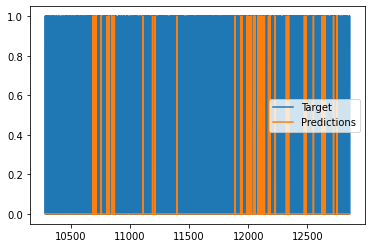

In [ ]:
predictions.iloc[-2571:].plot()

# Conclusions

There is still lots of place for the improvement when it comes to the stock price prediction model.


1.   Reduce step size - however this would significantly increase runtime!
2.   Discard older data
3.   Implement different machine learning algorithm
4.   Tweak random forest parameters
5.   Add more predictors (earning calls, dividends, external factors and so on)



Analyzing linear regression and correlation between Biden/Trump Polling Data, winnign rate, and stock prices we observed the following:



*   Energy and Tech stocks performed better when Biden had higher chance of winning
*   Finance and Healthcare stocks performed better when Trump had higher chance of winning
*   Polling data accurately predicted winner of political elections
*   All stocks we analyzed dipped at the onset of COVID-19 pandemic (March 2020)









Analyzing Wells Fargo Portfolio, we saw the following:



*   Stocks mentioned in the research could have external factors affecting their price 
*  They are positively correlated with the each respective candidate's wins. 
*  They are in the subdomain of the sector stocks we analyzed.



Our recommendations:

In order to hedge the political risk, one should invest in stocks with the lowest absolute minimum correlation with the polling data.

That consists of (according to the visualization of sector data):

1.   Utility
2.   Consumer Staples
3.   Industrial Services
4.   Communication Services




# Challenges





*   Obtaining historical hourly stock/sector data
*   Runtime - for small step size in random forest classifier, we need lots of energy and time.



# Potential Next Steps



*   Improve stock price predictions as described in conclusion
*   Upgrade website to be fully interactive and show live polling data versus stock performance graphs
*   Compute exact correlation for each candidate versus stock prices (as there is lots of stocks, this might be heavy to compute and would require lots of time)

